In [80]:
import pandas
import numpy
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [14]:
data = pandas.read_excel('./TOP500_202206.xlsx')

In [81]:
data = data[['Rank',
      'Previous Rank',
      'First Appearance',
      'First Rank',
      'Year',
      'Total Cores',
      'Accelerator/Co-Processor Cores',
      'Rmax [TFlop/s]',
      'Rpeak [TFlop/s]',
      'Nmax',
      'HPCG [TFlop/s]',
      'Power (kW)',
      'Energy Efficiency [GFlops/Watts]',
      'Processor Speed (MHz)',
      'Cores per Socket']]
# data.fillna(0, inplace=True)

In [38]:
data.isnull().sum()

Rank                                0
Previous Rank                       0
First Appearance                    0
First Rank                          0
Year                                0
Total Cores                         0
Accelerator/Co-Processor Cores      0
Rmax [TFlop/s]                      0
Rpeak [TFlop/s]                     0
Nmax                                0
HPCG [TFlop/s]                      0
Power (kW)                          0
Energy Efficiency [GFlops/Watts]    0
Processor Speed (MHz)               0
Cores per Socket                    0
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Rmax [TFlop/s]'>

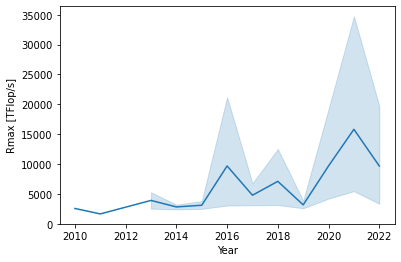

In [82]:
sns.lineplot(data=data, x="Year", y="Rmax [TFlop/s]")

In [71]:
y = data['Rmax [TFlop/s]']
# y = numpy.array(y).reshape(-1, 1)
# x = data.loc[:, data.columns != 'Rmax [TFlop/s]']
x = data['Year']
# x = numpy.array(x).reshape(-1, 1)

In [77]:
x

0      2021
1      2020
2      2022
3      2018
4      2018
       ... 
495    2018
496    2018
497    2018
498    2017
499    2017
Name: Year, Length: 500, dtype: int64

In [72]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
model = LogisticRegressionCV().fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[2021. 2020. 2022. 2018. 2018. 2016. 2021. 2020. 2018. 2022. 2020. 2020.
 2021. 2021. 2021. 2019. 2021. 2020. 2021. 2021. 2019. 2021. 2017. 2017.
 2021. 2018. 2020. 2021. 2021. 2018. 2021. 2021. 2019. 2021. 2020. 2020.
 2021. 2021. 2021. 2021. 2016. 2018. 2020. 2018. 2017. 2021. 2017. 2021.
 2021. 2020. 2021. 2019. 2021. 2022. 2020. 2021. 2020. 2022. 2018. 2021.
 2021. 2019. 2020. 2017. 2020. 2021. 2020. 2020. 2022. 2022. 2020. 2022.
 2019. 2019. 2016. 2021. 2019. 2017. 2021. 2019. 2020. 2017. 2017. 2021.
 2022. 2018. 2020. 2021. 2019. 2016. 2020. 2021. 2019. 2018. 2018. 2018.
 2015. 2018. 2021. 2020. 2013. 2021. 2021. 2019. 2021. 2021. 2020. 2018.
 2016. 2020. 2020. 2018. 2021. 2019. 2021. 2020. 2018. 2020. 2019. 2020.
 2022. 2019. 2022. 2017. 2015. 2021. 2018. 2016. 2016. 2020. 2021. 2018.
 2019. 2020. 2022. 2019. 2021. 2021. 2018. 2017. 2014. 2015. 2022. 2021.
 2020. 2022. 2020. 2020. 2021. 2020. 2020. 2015. 2017. 2021. 2020. 2017.
 2019. 2018. 2021. 2014. 2019. 2020. 2021. 2021. 2020. 2014. 2021. 2021.
 2021. 2021. 2015. 2021. 2019. 2020. 2020. 2019. 2016. 2019. 2015. 2019.
 2021. 2021. 2018. 2021. 2021. 2019. 2021. 2021. 2020. 2021. 2020. 2021.
 2021. 2021. 2021. 2021. 2022. 2020. 2022. 2022. 2021. 2021. 2021. 2020.
 2015. 2021. 2016. 2016. 2018. 2019. 2021. 2021. 2020. 2019. 2019. 2021.
 2021. 2019. 2019. 2020. 2021. 2020. 2021. 2019. 2019. 2022. 2022. 2020.
 2020. 2020. 2020. 2016. 2016. 2019. 2020. 2021. 2021. 2021. 2021. 2020.
 2019. 2021. 2017. 2020. 2020. 2021. 2022. 2021. 2018. 2010. 2020. 2018.
 2013. 2021. 2016. 2020. 2014. 2018. 2020. 2020. 2020. 2014. 2020. 2019.
 2017. 2017. 2019. 2020. 2020. 2019. 2020. 2019. 2020. 2020. 2021. 2021.
 2021. 2021. 2021. 2021. 2020. 2020. 2022. 2022. 2022. 2022. 2021. 2021.
 2021. 2021. 2020. 2020. 2021. 2020. 2020. 2020. 2018. 2019. 2020. 2020.
 2022. 2020. 2019. 2021. 2017. 2021. 2020. 2020. 2020. 2020. 2021. 2019.
 2020. 2020. 2021. 2018. 2021. 2021. 2021. 2015. 2019. 2021. 2021. 2019.
 2020. 2020. 2021. 2021. 2021. 2019. 2019. 2019. 2019. 2020. 2019. 2020.
 2019. 2021. 2022. 2021. 2020. 2020. 2020. 2020. 2019. 2018. 2019. 2019.
 2018. 2020. 2022. 2021. 2021. 2022. 2022. 2019. 2019. 2019. 2019. 2019.
 2019. 2018. 2022. 2014. 2020. 2019. 2019. 2019. 2019. 2020. 2019. 2022.
 2020. 2021. 2019. 2020. 2020. 2019. 2019. 2018. 2018. 2018. 2019. 2018.
 2019. 2019. 2018. 2018. 2018. 2019. 2019. 2019. 2019. 2019. 2021. 2021.
 2017. 2016. 2019. 2019. 2022. 2019. 2022. 2019. 2020. 2018. 2017. 2019.
 2018. 2019. 2019. 2016. 2019. 2020. 2021. 2019. 2018. 2018. 2016. 2020.
 2019. 2019. 2020. 2019. 2020. 2019. 2019. 2019. 2018. 2019. 2018. 2017.
 2019. 2021. 2018. 2019. 2018. 2018. 2021. 2019. 2019. 2019. 2019. 2018.
 2018. 2017. 2018. 2017. 2018. 2019. 2019. 2019. 2017. 2019. 2019. 2018.
 2018. 2017. 2017. 2017. 2018. 2021. 2019. 2020. 2017. 2019. 2018. 2015.
 2018. 2018. 2018. 2019. 2018. 2019. 2015. 2018. 2018. 2019. 2011. 2018.
 2019. 2017. 2018. 2018. 2018. 2019. 2018. 2018. 2018. 2018. 2018. 2018.
 2018. 2018. 2018. 2018. 2018. 2018. 2017. 2017.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
x_test = numpy.array([2025]).reshape(1, -1)
y_pred = model.predict(x_test)

In [64]:
y_pred

array([[18091.22045737]])